## ***Week1 Intoduction to Time Series***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_timeSeries(time, series, start=0, end=None, label=None, format="-"):
  plt.figure(figsize=(10,8))
  if type(series) is tuple:
    for series_num in series:
      plt.plot(time[start:end], series_num[start:end], format)
  else: 
    plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label is not None:
    plt.legend(fontsize=16, labels=label)
  plt.grid(True)
  plt.show()

In [ ]:
def trend(time, slope):
  series = time*slope
  return series

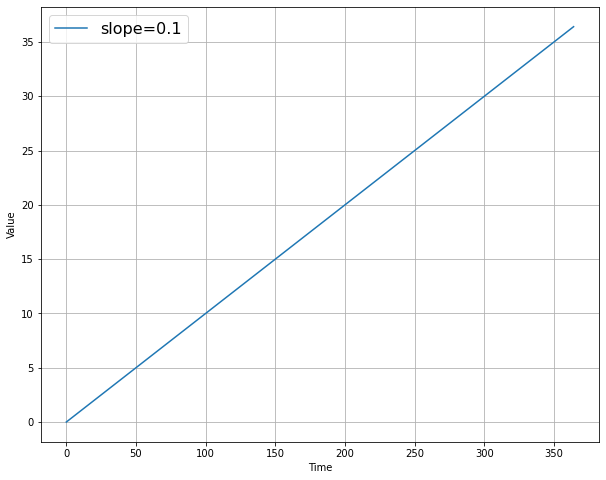

In [ ]:
time = np.arange(365)
slope = 0.1
series = trend(time, slope)
plot_timeSeries(time, series, label=[f"slope={slope}"])

In [ ]:
def Seasonality(time, period, amplitude = 1, phase = 0):
  season_time = ((time+phase)%period)/period
  data_pattern = amplitude*season_pattern(season_time)
  return data_pattern

def season_pattern(season_time):
  print(season_time)
  return np.where(season_time<0.04, np.cos(season_time*2*np.pi), 1/np.exp(3*season_time))

[0.01369863 0.01643836 0.01917808 ... 0.00821918 0.0109589  0.01369863]


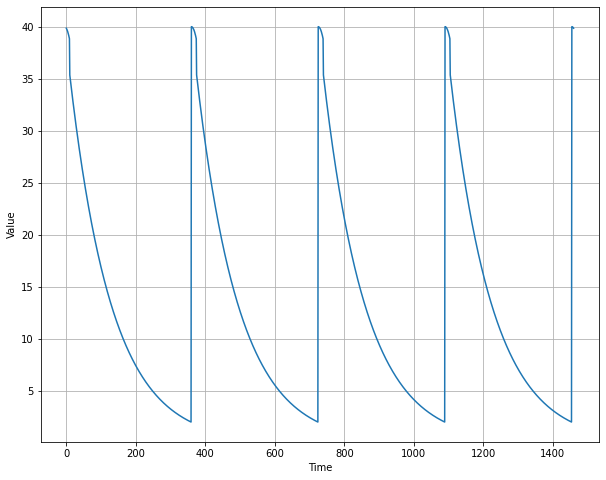

In [ ]:
time = np.arange(4*365+1)
series = Seasonality(time, 365, 40,5)
plot_timeSeries(time, series)

[0.01369863 0.01643836 0.01917808 ... 0.00821918 0.0109589  0.01369863]


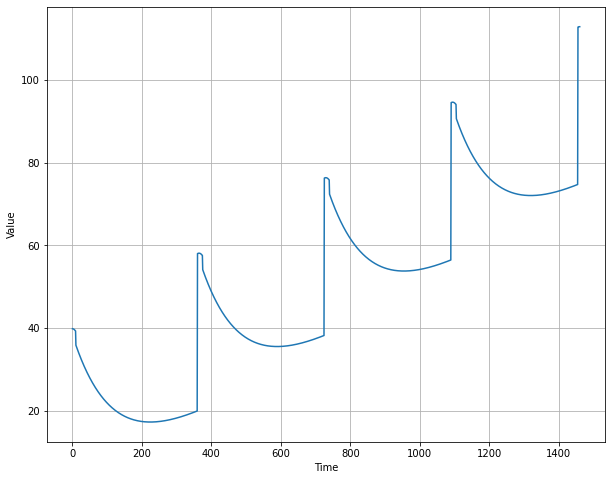

In [ ]:
series = trend(time, 0.05)+Seasonality(time, 365, 40, 5)
plot_timeSeries(time, series)


In [ ]:
def noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level

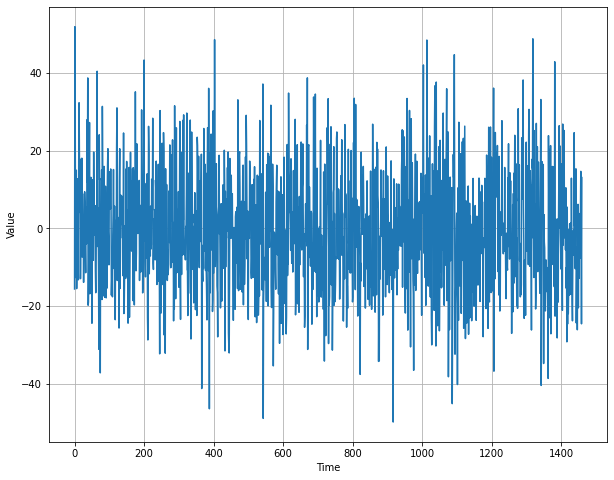

In [ ]:
noise_signal = noise(time, 15, seed=None)
plot_timeSeries(time, noise_signal)

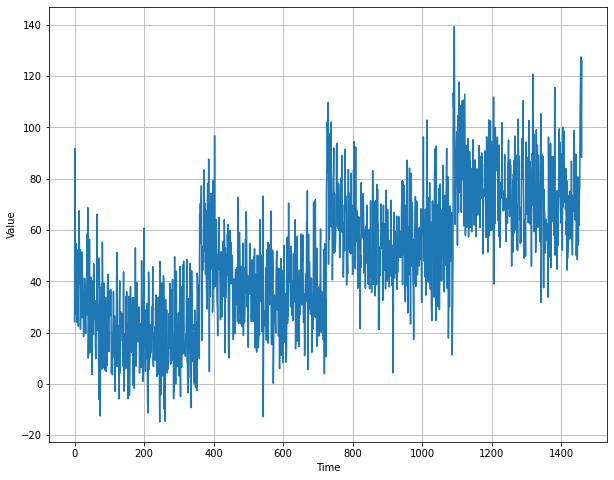

In [ ]:
series = series+noise_signal
plot_timeSeries(time, series)

In [ ]:
def autoCorelate(time, amplitude=1, seed=None):
  rnd = np.random.RandomState(seed)
  arr = rnd.randn(len(time)+50)
  arr[:50] = 100
  phi1=0.5
  phi2=-0.1
  for step in range(50, len(time)+50):
    arr[step]+=phi1*arr[step-50]
    arr[step]+=phi2*arr[step-40]

  return arr[50:]+amplitude

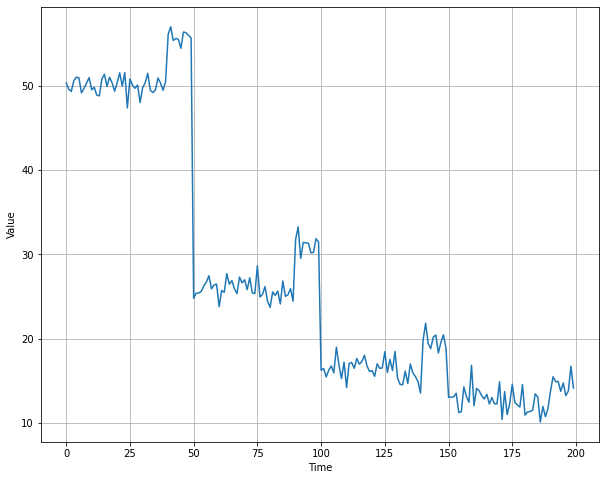

In [ ]:
series = autoCorelate(time, amplitude=10, seed=42)
plot_timeSeries(time[:200], series[:200])

In [ ]:
def simpleAutoCorelate(time, amplitude=1, seed=None):
  rnd = np.random.RandomState(seed)
  arr = rnd.randn(len(time)+1)
  # arr[0] = 100
  phi1=0.5
  for step in range(1, len(time)+1):
    arr[step]+=phi1*arr[step-1]

  return arr[1:]+amplitude

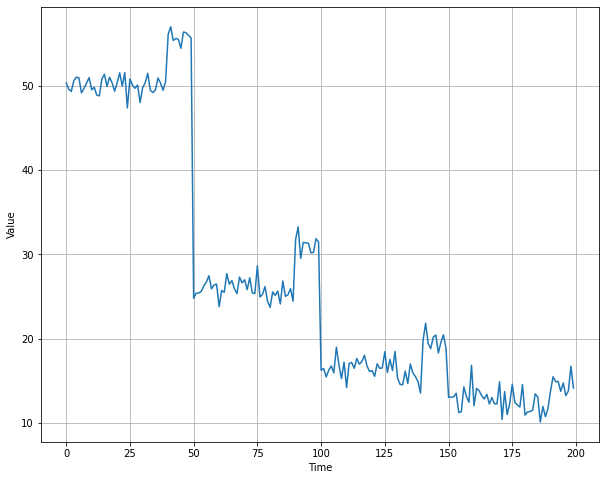

In [ ]:
series = autoCorelate(time, amplitude=10, seed=42)
plot_timeSeries(time[:200], series[:200])

In [ ]:
def impulses(time, impluse_size, amplitude=1, seed=None):
  rnd = np.random.RandomState(seed)
  impulse_indices = rnd.randint(len(time), size=impluse_size)
  series = np.zeros(len(time))
  for idx in impulse_indices:
    series[idx]+=rnd.rand()*amplitude
  return series

[0.         0.         0.         ... 0.         8.66176146 0.        ]


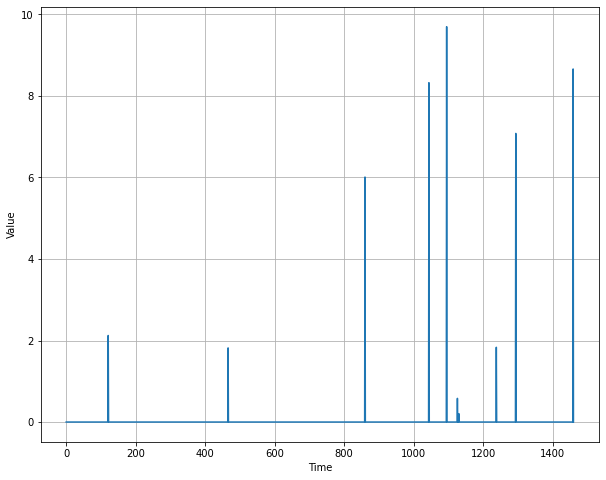

In [ ]:
series = impulses(time, 10, 10, 42)
print(series)
plot_timeSeries(time, series)

In [ ]:
def autorelated_impulse(source, phis):
  series = source.copy()
  for step, value in enumerate(series):
    for lag, phi in phis.items():
      if step-lag>0:
        series[step] += phi*series[step-lag]
  return series

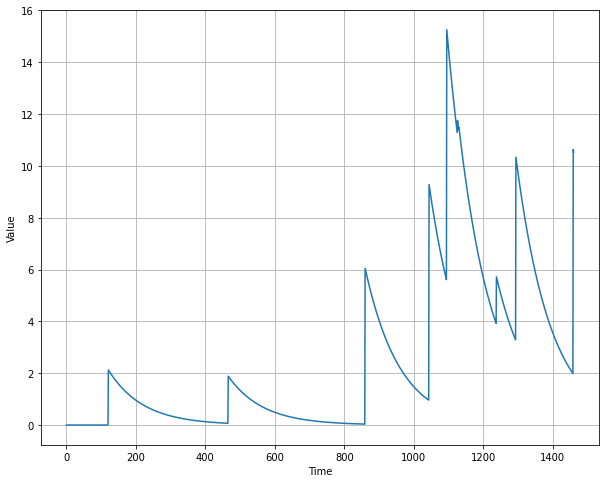

In [ ]:
series = autorelated_impulse(series, {1:0.99})
plot_timeSeries(time, series)

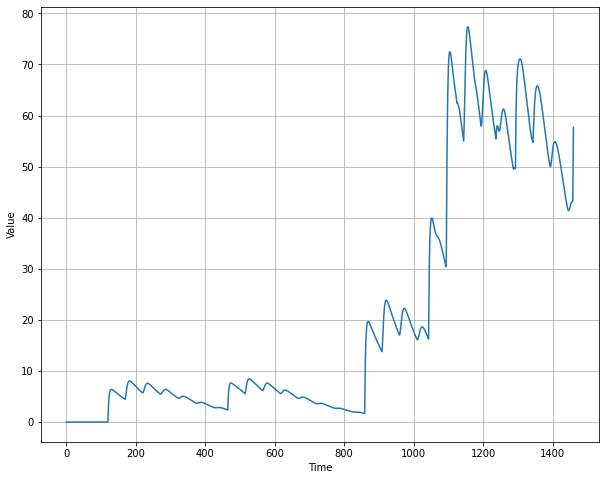

In [ ]:
series = autorelated_impulse(series, {1:0.7, 50:0.2})
plot_timeSeries(time, series)

[0.1  0.12 0.14 ... 0.26 0.28 0.3 ]


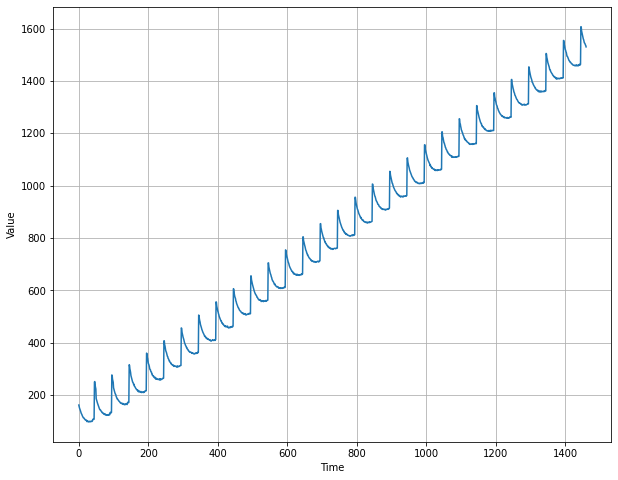

In [ ]:
series = trend(time, 1)+Seasonality(time, 50, 150, 5)+ autoCorelate(time, amplitude=10, seed=42)
plot_timeSeries(time, series)

[0.   0.02 0.04 ... 0.16 0.18 0.2 ]
[0.   0.02 0.04 ... 0.16 0.18 0.2 ]


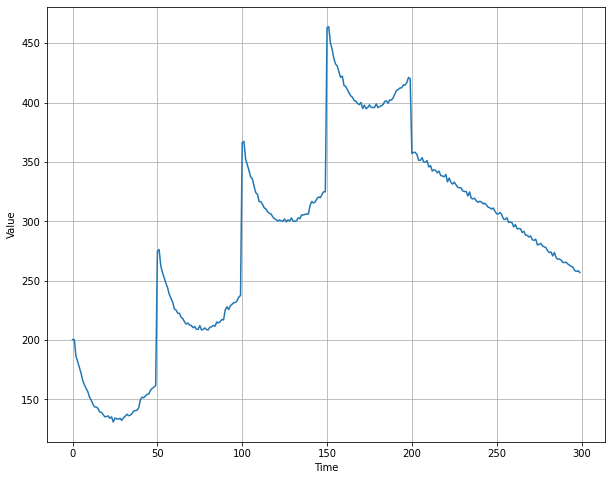

In [ ]:
series = trend(time, 2)+Seasonality(time, 50, 150)+ autoCorelate(time, amplitude=10, seed=42)
series2 = trend(time, -1)+Seasonality(time, 50, 2)+ autoCorelate(time, amplitude=5, seed=42) + 550
series[200:] = series2[200:]
plot_timeSeries(time[:300], series[:300])

In [ ]:
time = np.arange(365*4+1, dtype="float32")
baseline=10
amplitude=40
seed=42
period=365
slope=0.5
noise_level=5
series = Seasonality(time, period=period, amplitude=amplitude)+trend(time, slope)+autoCorelate(time, amplitude=amplitude, seed=seed)+baseline
series += noise(time, noise_level, seed)

[0.         0.00273973 0.00547945 ... 0.99452055 0.9972603  0.        ]


In [ ]:
split=1000
train_time=time[:split]
train_series = series[:split]

val_time = time[split:]
val_series = series[split:]

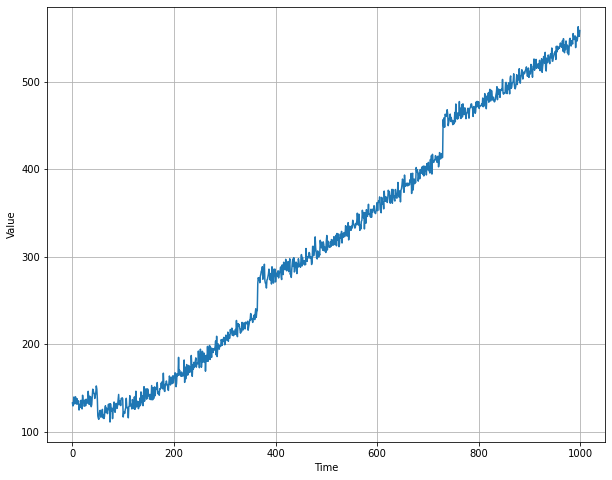

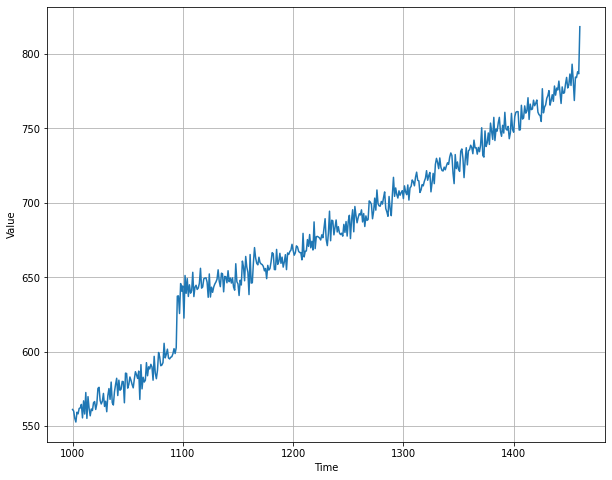

In [ ]:
plot_timeSeries(train_time, train_series)
plot_timeSeries(val_time, val_series)

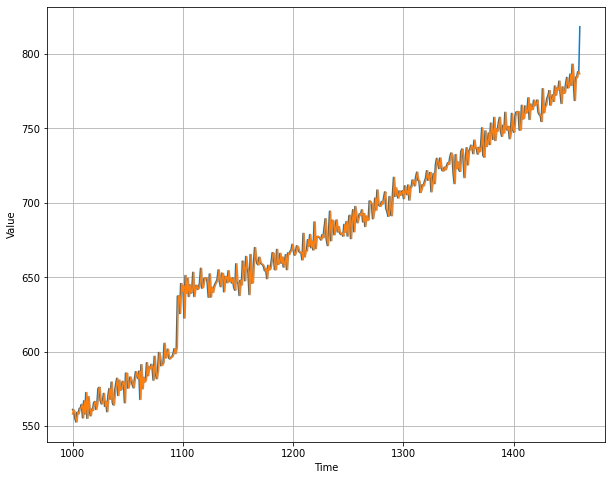

In [ ]:
naive_forecast = series[split-1:-1]
plot_timeSeries(val_time, (val_series, naive_forecast))

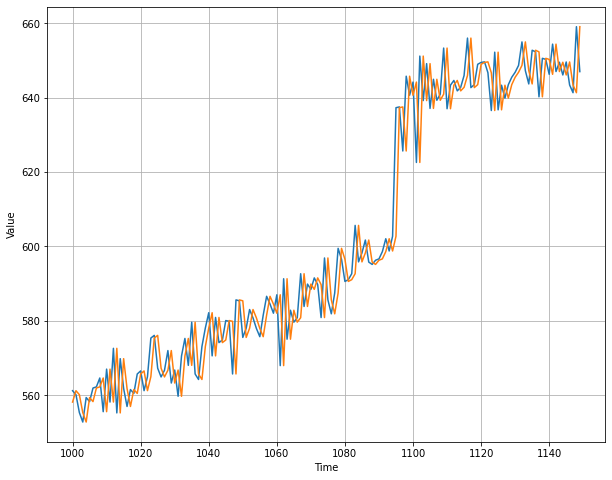

In [ ]:

plot_timeSeries(val_time, (val_series, naive_forecast), start=0, end=150)

In [ ]:
import tensorflow as tf

print(tf.keras.metrics.mean_squared_error(val_series, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(val_series, naive_forecast).numpy())

70.73798792646294
6.447138625679876


In [ ]:
def moving_average(series, window_size):
  forecast=[]
  for time in range(len(series)-window_size):
    forecast.append(series[time:time+window_size].mean())
  return np.array(forecast)

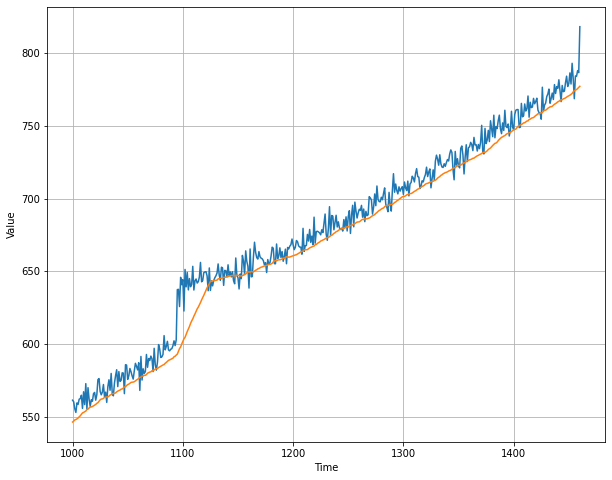

In [ ]:
moving_avg = moving_average(series, 30)[split-30:]
plot_timeSeries(val_time, (val_series, moving_avg))

In [ ]:
print(tf.keras.metrics.mean_squared_error(val_series, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(val_series, moving_avg).numpy())

127.85958957427667
8.602294093642614


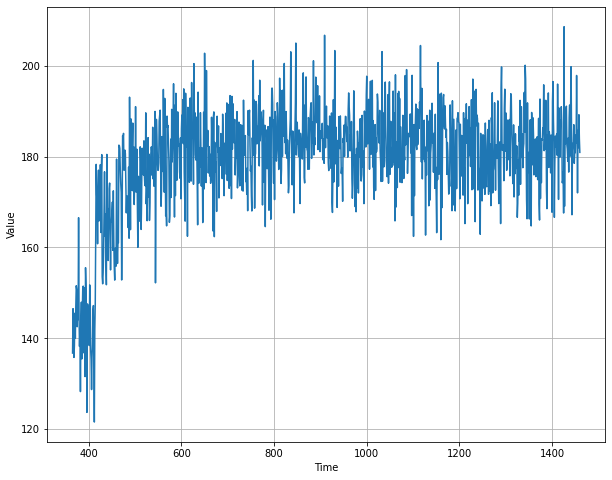

In [ ]:
diff_series = series[365:]-series[:-365]
diff_time = time[365:]
plot_timeSeries(diff_time, diff_series)

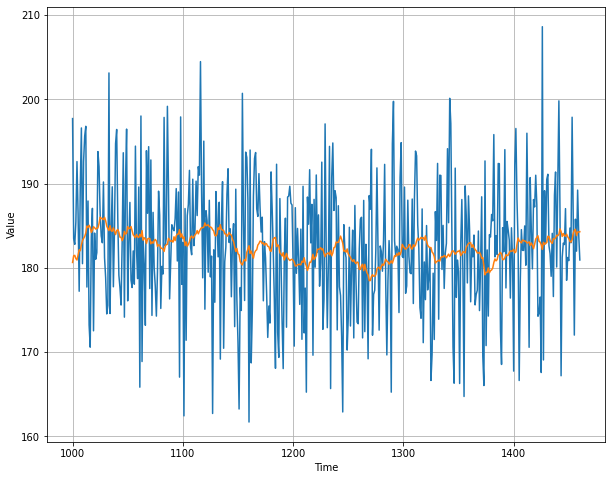

In [ ]:
moving_avg = moving_average(diff_series, 30)[split-30-365:]
diff_series = diff_series[split-365:]
plot_timeSeries(val_time, (diff_series, moving_avg))

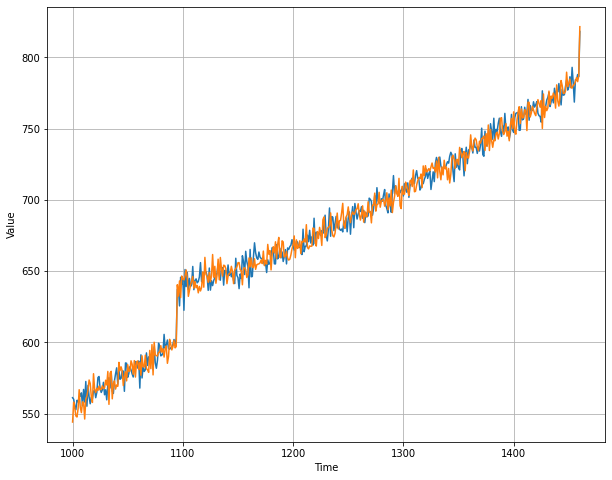

In [ ]:
moving_avg_past = series[split-365:-365]+moving_avg

plot_timeSeries(val_time, (val_series, moving_avg_past))

In [ ]:
print(tf.keras.metrics.mean_squared_error(val_series, moving_avg_past).numpy())
print(tf.keras.metrics.mean_absolute_error(val_series, moving_avg_past).numpy())

66.15146762414733
6.48690982271404


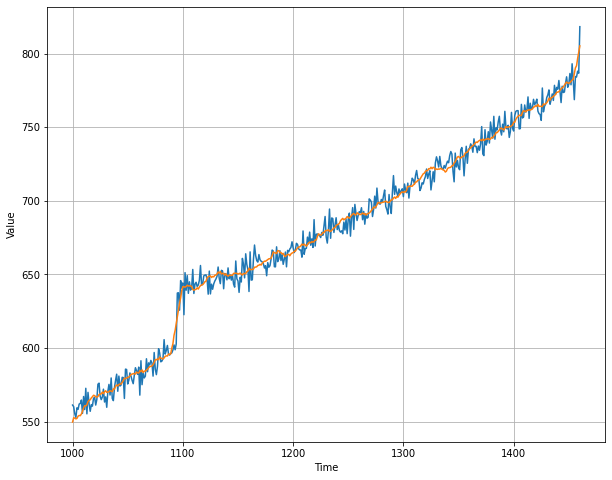

In [ ]:
moving_avg_smooth = moving_average(series[split-370:-359], 11)+moving_avg
plot_timeSeries(val_time, (val_series, moving_avg_smooth))

In [ ]:
print(tf.keras.metrics.mean_squared_error(val_series, moving_avg_smooth).numpy())
print(tf.keras.metrics.mean_absolute_error(val_series, moving_avg_smooth).numpy())

38.25555603498303
4.917053734060555


# **Week2 Time Series with DNN**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
dataset = tf.data.Dataset.range(10)
for val in dataset:
  print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(size=5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window:(window[:-1], window[-1]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(batch_size=2).prefetch(1)
for x,y in dataset:
  print(f"x----->{x.numpy()}")
  print(f"y label----->{y.numpy()}")

x----->[[4 5 6 7]
 [2 3 4 5]]
y label----->[8 6]
x----->[[1 2 3 4]
 [5 6 7 8]]
y label----->[5 9]
x----->[[0 1 2 3]
 [3 4 5 6]]
y label----->[4 7]


[0.         0.00273973 0.00547945 ... 0.99452055 0.9972603  0.        ]


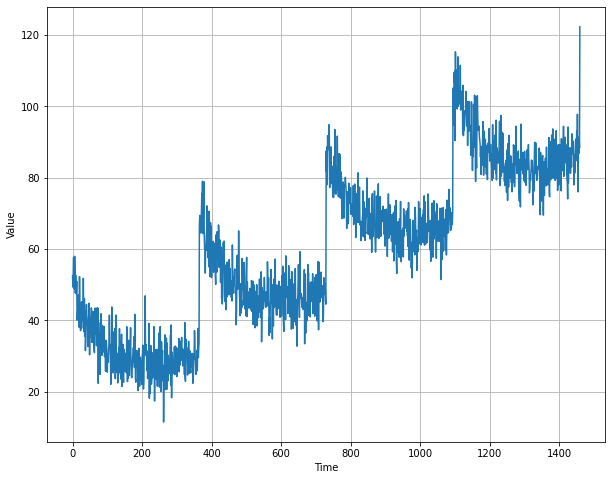

In [ ]:
time = np.arange(4*365+1, dtype="float32")
series = 10 + trend(time, 0.05) + Seasonality(time, period=365, amplitude=40)
series += noise(time, noise_level=5, seed=42)
plot_timeSeries(time, series)

In [ ]:
split_time=1000
train_time = time[:split_time]
train_series = series[:split_time]
val_time = time[split_time:]
val_series = series[split_time:]

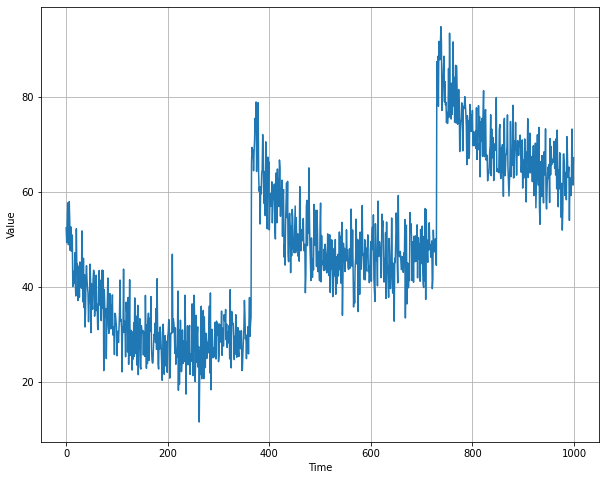

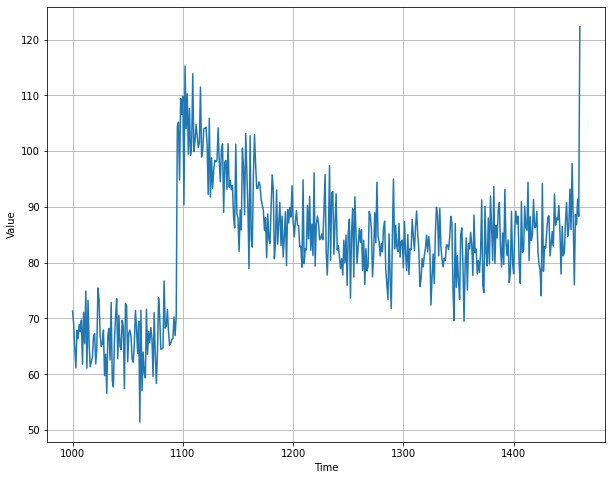

In [ ]:
plot_timeSeries(train_time, train_series)
plot_timeSeries(val_time, val_series)

In [ ]:
def generate_dataset(series, buffer_size, batch_size, window_size):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window:window.batch(window_size+1))
  dataset = dataset.map(lambda window:(window[:-1], window[-1]))
  dataset = dataset.shuffle(buffer_size)
  dataset = dataset.batch(batch_size=batch_size).prefetch(1)
  return dataset

In [ ]:
buffer_size, batch_size, window_size = 1000, 32, 20
dataset = generate_dataset(series,buffer_size, batch_size, window_size)

In [ ]:
for window in dataset.take(1):
  print(f"window type--->{type(window)}")
  print(f"len train data---->{len(window)}")
  print(f"shape of train data---->{window[0].shape}")
  print(f"shape of train label---->{window[1].shape}")

window type---><class 'tuple'>
len train data---->2
shape of train data---->(32, 20)
shape of train label---->(32,)


In [ ]:
# Build the single layer neural network
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

# Print the initial layer weights
print("Layer weights: \n {} \n".format(l0.get_weights()))

# Print the model summary
model.summary()

Layer weights: 
 [array([[ 0.40252936],
       [-0.27482837],
       [-0.02768815],
       [ 0.34934032],
       [-0.25809804],
       [-0.42107874],
       [ 0.2874689 ],
       [-0.16390514],
       [-0.03638759],
       [-0.33841562],
       [ 0.42068624],
       [-0.08319876],
       [-0.41217554],
       [ 0.5174425 ],
       [ 0.22791731],
       [ 0.33042192],
       [-0.5034518 ],
       [ 0.03563809],
       [ 0.30873728],
       [ 0.24351025]], dtype=float32), array([0.], dtype=float32)] 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset, epochs=100)

Epoch 1/100
46/46 [==============================] - 1s 11ms/step - loss: 139.1336
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 83.2360
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 81.0973
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 77.4656
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 84.0897
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 73.9268
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 72.8285
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 71.0574
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 71.5101
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: 74.5006
Epoch 11/100
46/46 [==============================] - 0s 2ms/step - loss: 67.8320
Epoch 12/100
46/46 [==============================] - 0s 2ms/step - loss: 63.8454
Epoch 13/100
46/46 [===

In [ ]:
print(f"layer_weights----->{l0.get_weights()}")

layer_weights----->[array([[ 0.03480783],
       [-0.06143647],
       [ 0.04840105],
       [ 0.02166016],
       [ 0.01764098],
       [-0.06609815],
       [ 0.01829864],
       [-0.00239351],
       [ 0.00305725],
       [-0.02462448],
       [ 0.04934888],
       [ 0.01577398],
       [-0.07224828],
       [ 0.09035181],
       [ 0.07147589],
       [ 0.11124668],
       [ 0.03120015],
       [ 0.17735074],
       [ 0.2384412 ],
       [ 0.28587446]], dtype=float32), array([0.00729159], dtype=float32)]


In [ ]:
print(f"shape of first 20 series:{series[:20].shape}")
print(f"shape of first 20 series with new axis:{series[:20][np.newaxis].shape}")
print(f"shape of first 20 series with expanding:{np.expand_dims(series[:20],axis=0).shape}")
print(f"model prediction:{model.predict(series[:20][np.newaxis])}")

shape of first 20 series:(20,)
shape of first 20 series with new axis:(1, 20)
shape of first 20 series with expanding:(1, 20)
1/1 [==============================] - 0s 87ms/step
model prediction:[[41.102566]]


In [ ]:
forecast = []

for time in range(len(series)-window_size):
  forecast.append(model.predict(series[time:time+window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]

print(f"len of forecast array---->{len(forecast)}")
print(f"len of actual val array---->{val_series.shape}")

1/1 [==============================] - 0s 31ms/step
len of forecast array---->461
len of actual val array---->(461,)


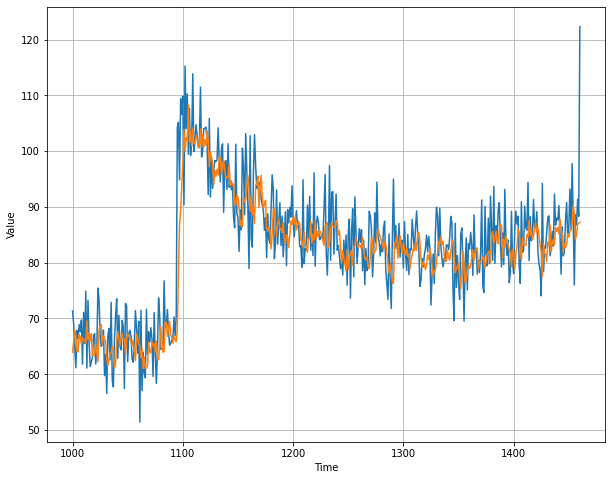

In [ ]:
forecast = np.array(forecast).squeeze()
plot_timeSeries(val_time, (val_series, forecast))

In [ ]:
print(tf.keras.metrics.mean_squared_error(val_series, forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(val_series, forecast).numpy())

38.54959
4.6105824


In [ ]:
def create_model():
  model =tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, input_shape=[window_size], activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

  model.summary()
  return model 

In [ ]:
model = create_model()
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset, epochs=100 )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] - 1s 7ms/step - loss: 591.9750
Epoch 2/100
46/46 [==============================] - 1s 5ms/step - loss: 47.7054
Epoch 3/100
46/46 [==============================] - 1s 4ms/step - loss: 44.3065
Epoch 4/100
46/46 [==============================] - 1s 5ms/step - loss: 43.

In [ ]:
def modell_forecast(series, window_size, batch_size):
  forecast = []
  val_dataset = tf.data.Dataset.from_tensor_slices(series)
  val_dataset = val_dataset.window(window_size, shift=1, drop_remainder=True)
  val_dataset = val_dataset.flat_map(lambda window:window.batch(window_size))
  val_dataset = val_dataset.batch(batch_size).prefetch(1)
  return model.predict(val_dataset)

In [ ]:
def evaluate_model(model):
  forecast= []
  forecast_sequence = series[split_time-window_size:]
  # forecast = modell_forecast(forecast_sequence, window_size, batch_size)
  for time in range(len(forecast_sequence)-window_size):
    forecast.append(model.predict(forecast_sequence[time:time+window_size][np.newaxis]))

  forecast = np.array(forecast).squeeze()
  return forecast

In [ ]:
def calculate_loss(val_series, result):
  print(tf.keras.metrics.mean_absolute_error(val_series, result).numpy())
  print(tf.keras.metrics.mean_squared_error(val_series, result).numpy())

1/1 [==============================] - 0s 34ms/step


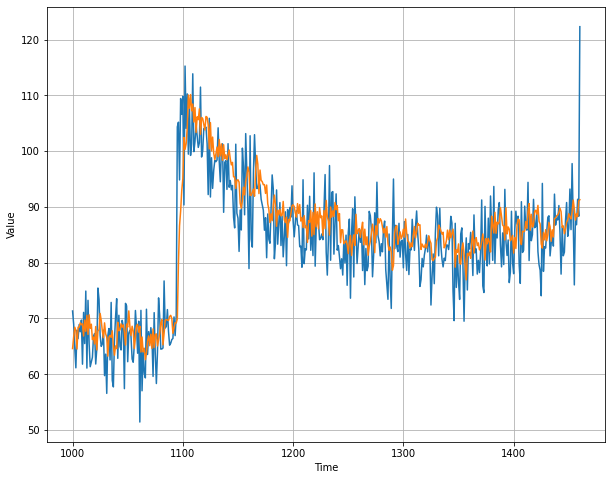

In [ ]:
forecast = evaluate_model(model)
plot_timeSeries(val_time, (val_series, forecast))

In [ ]:
calculate_loss(val_series, forecast)

4.953867
40.88208


In [ ]:
model = create_model()
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(momentum=0.9))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(dataset, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
46/46 [==============================] - 1s 5ms/step - loss: 3907.2522 - lr: 1.0000e-08
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 2553.3264 - lr: 1.1220e-08
Epoch 3/100
46/46 [==============================] - 1s 5ms/step - loss: 1812.9213 - lr: 1.2589e-08
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 1264.4729 - lr: 1.4125e-08
Epoch 5/100
46/46 [==============================] - 1s 5ms/step - loss: 749.7973 - lr: 1.5849e-08
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 362.6519 - lr: 1.7783e-08
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 157.2608 - lr: 1.9953e-08
Epoch 8/100
46/46 [==============================] - 0s 4ms/step - loss: 85.1655 - lr: 2.2387e-08
Epoch 9/100
46/46 [==============================] - 0s 4ms/step - loss: 70.7767 - lr: 2.5119e-08
Epoch 10/100
46/46 [==============================] - 0s 4ms/step - loss: 68.9046 - lr: 2.8184e-08
Epoch 11

(1e-08, 0.001, 0.0, 300.0)

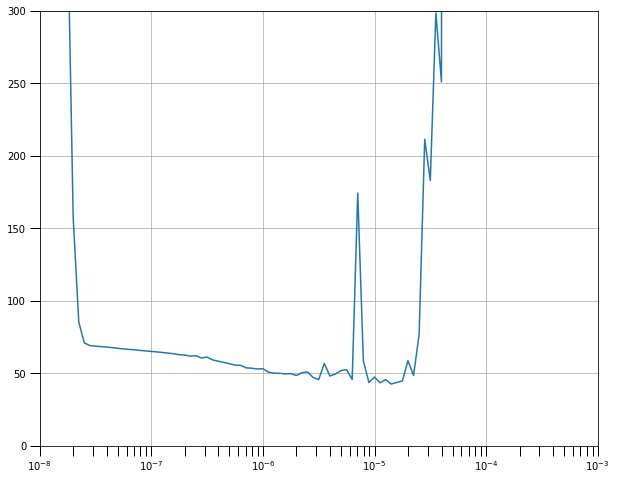

In [ ]:
lrs = 1e-8 * 10**(np.arange(100)/20)

plt.figure(figsize=(10,8))
plt.semilogx(lrs, history.history['loss'])
plt.grid(True)
plt.tick_params('both', length=10, width=1, which='both')
plt.axis([1e-8, 1e-3, 0, 300])

In [ ]:
model = create_model()
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=4e-6, momentum=0.9))
history = model.fit(dataset, epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
46/46 [==============================] - 1s 7ms/step - loss: 445.5581
Epoch 2/500
46/46 [==============================] - 1s 5ms/step - loss: 53.5714
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 53.2100
Epoch 4/500
46/46 [==============================] - 0s 6ms/step - loss: 48.

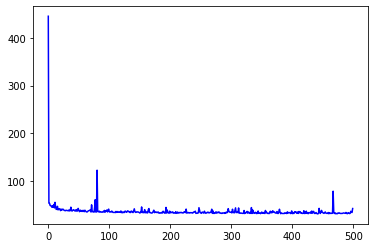

In [ ]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label="training_loss")
plt.show()

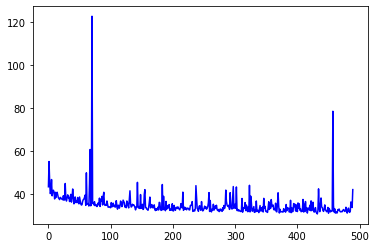

In [ ]:
loss = history.history['loss'][10:]
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label="training_loss")
plt.show()

In [ ]:
forecast = evaluate_model(model)
calculate_loss(val_series, forecast)

1/1 [==============================] - 0s 20ms/step
4.335419
34.17409


# **Week3 Time series sequencing with RNN and LSTM**

In [ ]:
def create_RNN_model(window_size):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=-1), input_shape=[window_size]),
      tf.keras.layers.SimpleRNN(40, return_sequences=True),
      tf.keras.layers.SimpleRNN(40),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Lambda(lambda x:x*100.0)
  ])
  model.summary()
  return model

In [ ]:
model = create_RNN_model(window_size)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8 * 10 **(epoch/20))
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)
history = model.fit(dataset, epochs=100, callbacks = [lr_scheduler])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_6 (Lambda)           (None, 20, 1)             0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 20, 40)            1680      
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dense_12 (Dense)            (None, 1)                 41        
                                                                 
 lambda_7 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] -

(1e-08, 0.001, 0.0, 50.0)

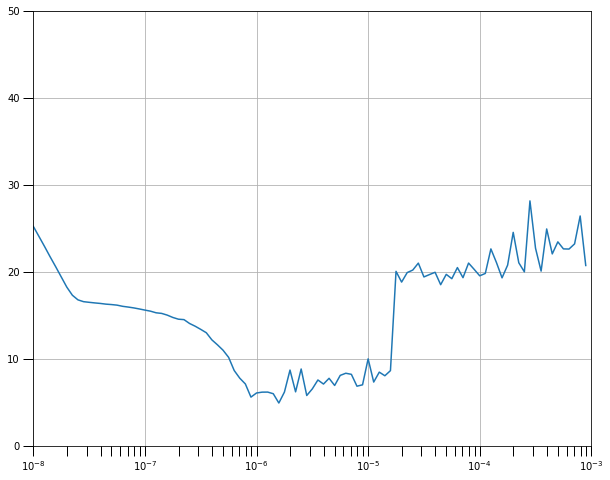

In [ ]:
lrs = 1e-8 * 10 ** (np.arange(100)/20)
plt.figure(figsize=(10,8))
plt.grid(True)
plt.semilogx(lrs, history.history['loss'])
plt.tick_params('both', length=10, width=1, which='both')
plt.axis([1e-8, 1e-3, 0, 50])

In [ ]:
model = create_RNN_model(window_size)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mse'])
history = model.fit(dataset, epochs=100)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_8 (Lambda)           (None, 20, 1)             0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 20, 40)            1680      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 40)                3240      
                                                                 
 dense_13 (Dense)            (None, 1)                 41        
                                                                 
 lambda_9 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] -

In [ ]:
forecast = evaluate_model(model)
calculate_loss(val_series, forecast)

15/15 [==============================] - 0s 8ms/step
5.0545034
44.304546


In [ ]:
def create_lstm_model(window_size):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=-1), input_shape=[window_size]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Lambda(lambda x:x*100.0)
  ])
  model.summary()
  return model

In [ ]:
lstm_model = create_lstm_model(window_size)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8 *10 **(epoch/20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
lstm_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])
history = lstm_model.fit(dataset, epochs=100, callbacks=[lr_scheduler])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_12 (Lambda)          (None, 20, 1)             0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 64)           8704      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
 lambda_13 (Lambda)          (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-trai

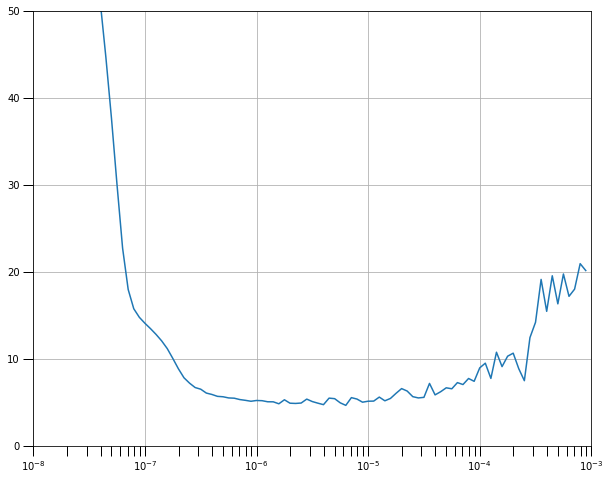

In [ ]:
lrs = 1e-8 *10 **(np.arange(100)/20)
plt.figure(figsize=(10,8))
plt.grid(True)
plt.semilogx(lrs, history.history['loss'])
plt.tick_params('both', length=10, width=1, which='both')
plt.axis([1e-8, 1e-3, 0, 50])
plt.show()

In [ ]:
tf.keras.backend.clear_session()
lstm_model = create_lstm_model(window_size)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
lstm_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])
history = lstm_model.fit(dataset, epochs=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 20, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 20, 64)           8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-traina

In [ ]:
forecast = evaluate_model(lstm_model)
calculate_loss(val_series, forecast)

1/1 [==============================] - 0s 22ms/step
4.86485
50.271404


In [ ]:
tf.keras.backend.clear_session()
val_data = generate_dataset(val_series, buffer_size=buffer_size, batch_size=batch_size, window_size=window_size)
Val_lstm_model = create_lstm_model(window_size)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
Val_lstm_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])
history = Val_lstm_model.fit(dataset, epochs=100, validation_data = val_data)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 20, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 20, 64)           8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-traina

In [ ]:
val_forecast = evaluate_model(Val_lstm_model)
calculate_loss(val_series, val_forecast)

1/1 [==============================] - 0s 26ms/step
4.6917887
43.962807


# **Week 4 Time series with CNN and real data**

In [ ]:
def create_CNN_model(window_size):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(32, 3, padding='causal', strides=1, activation='relu', input_shape=[window_size, 1]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Lambda(lambda x:x*400.0)
  ])
  model.summary()
  return model

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
cnn_model = create_CNN_model(window_size)
model_pre_weights = cnn_model.get_weights()
cnn_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])
history=cnn_model.fit(dataset, epochs=100, callbacks=[lr_scheduler])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 20, 32)            128       
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 64)           16640     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 41,665
Trainable params: 41,665
Non-trai

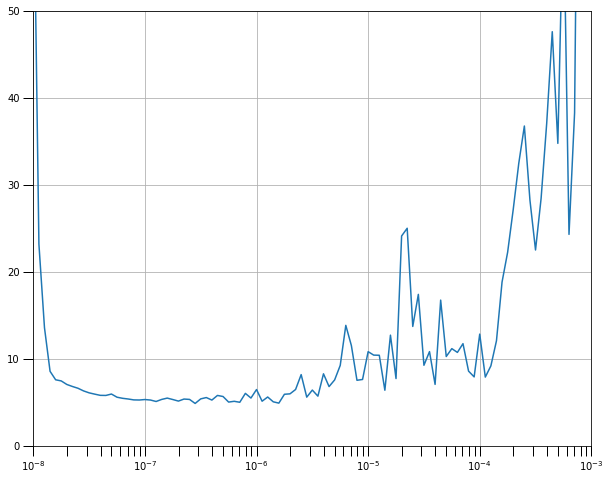

In [ ]:
lrs = 1e-8 * 10 **(np.arange(100)/20)
plt.figure(figsize=(10,8))
plt.grid(True)
plt.semilogx(lrs, history.history['loss'])
plt.tick_params('both', length=10, width=1, which='both')
plt.axis([1e-8, 1e-3, 0, 50])
plt.show()

In [ ]:
tf.keras.backend.clear_session()
cnn_model.set_weights(model_pre_weights)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)
cnn_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])
history=cnn_model.fit(dataset, epochs=100)

Epoch 1/500
46/46 [==============================] - 9s 37ms/step - loss: 29.5758 - mae: 30.0683
Epoch 2/500
46/46 [==============================] - 3s 54ms/step - loss: 7.6612 - mae: 8.1486
Epoch 3/500
46/46 [==============================] - 3s 58ms/step - loss: 5.9687 - mae: 6.4501
Epoch 4/500
46/46 [==============================] - 4s 70ms/step - loss: 5.7535 - mae: 6.2374
Epoch 5/500
46/46 [==============================] - 2s 47ms/step - loss: 5.5467 - mae: 6.0269
Epoch 6/500
46/46 [==============================] - 3s 68ms/step - loss: 5.6636 - mae: 6.1446
Epoch 7/500
46/46 [==============================] - 3s 68ms/step - loss: 5.5163 - mae: 5.9981
Epoch 8/500
46/46 [==============================] - 2s 41ms/step - loss: 5.2312 - mae: 5.7072
Epoch 9/500
46/46 [==============================] - 3s 53ms/step - loss: 5.1657 - mae: 5.6419
Epoch 10/500
46/46 [==============================] - 3s 54ms/step - loss: 5.1616 - mae: 5.6396
Epoch 11/500
46/46 [===========================

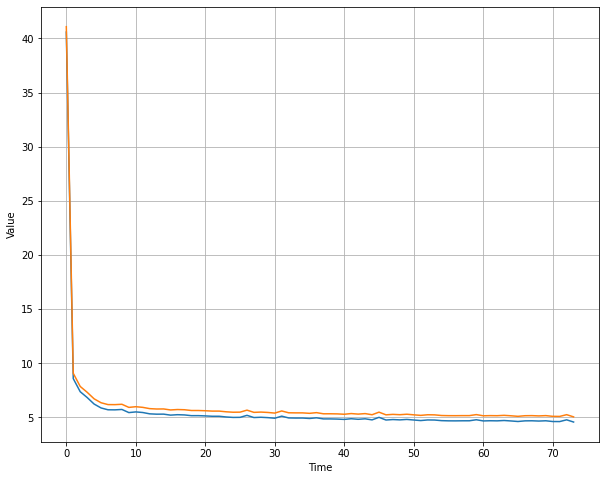

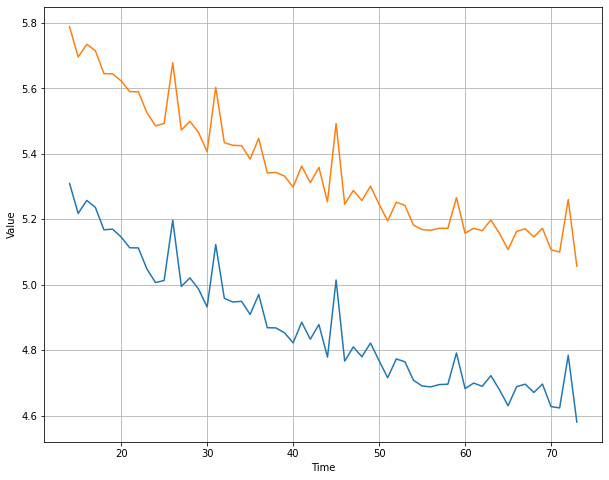

In [ ]:
loss = history.history['loss']
mae = history.history['mae']

epochs = range(len(loss))
plot_timeSeries(epochs, (loss, mae))

zoom_split = int(epochs[-1]*0.2) 
zoom_epochs = epochs[zoom_split:] 
zoom_loss = loss[zoom_split:] 
zoom_mae = mae[zoom_split:]

plot_timeSeries(zoom_epochs, (zoom_loss, zoom_mae))

In [ ]:
forecast = evaluate_model(cnn_model)
calculate_loss(val_series, forecast)

1/1 [==============================] - 0s 20ms/step
4.868027
47.213314


In [ ]:
class Mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_mae')<5.2:
      print("reached the disarable mae hence stopping the training")
      self.model.stop_training=True

callback = Mycallbacks()

In [ ]:
val_data = generate_dataset(val_series, buffer_size, batch_size, window_size)
tf.keras.backend.clear_session()
cnn_model.set_weights(model_pre_weights)
optimizer = tf.keras.optimizers.SGD(learning_rate=4e-8, momentum=0.9)
cnn_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])
history=cnn_model.fit(dataset, epochs=100, validation_data=val_data, callbacks=[callback])

Epoch 1/500
46/46 [==============================] - 10s 70ms/step - loss: 40.5901 - mae: 41.0871 - val_loss: 9.0262 - val_mae: 9.5161
Epoch 2/500
46/46 [==============================] - 2s 35ms/step - loss: 8.5886 - mae: 9.0785 - val_loss: 6.6856 - val_mae: 7.1649
Epoch 3/500
46/46 [==============================] - 2s 34ms/step - loss: 7.3800 - mae: 7.8654 - val_loss: 6.2352 - val_mae: 6.7161
Epoch 4/500
46/46 [==============================] - 2s 34ms/step - loss: 6.8439 - mae: 7.3280 - val_loss: 5.8460 - val_mae: 6.3281
Epoch 5/500
46/46 [==============================] - 2s 34ms/step - loss: 6.2408 - mae: 6.7233 - val_loss: 5.5639 - val_mae: 6.0431
Epoch 6/500
46/46 [==============================] - 2s 34ms/step - loss: 5.8805 - mae: 6.3604 - val_loss: 5.5607 - val_mae: 6.0418
Epoch 7/500
46/46 [==============================] - 2s 35ms/step - loss: 5.7106 - mae: 6.1906 - val_loss: 5.4531 - val_mae: 5.9354
Epoch 8/500
46/46 [==============================] - 2s 35ms/step - loss:

# **Week 4 Time Series on real Data**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv


In [ ]:
def plot_series(time, series, start=0, end=None, title=None, xlabel=None, ylabel=None, legend=None, format="-"):
  plt.figure(figsize=(10,8))
  plt.grid(True)
  if type(series) is tuple:
    for y in series:
      plt.plot(time[start:end], y[start:end],format)
  else:
    plt.plot(time[start:end], series[start:end], format)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  if legend:
    plt.legend(legend)
  plt.title(title)
  plt.show()

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course4/Sunspots.csv


--2022-10-30 11:56:02--  https://storage.googleapis.com/tensorflow-1-public/course4/Sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.211.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [text/csv]
Saving to: ‘Sunspots.csv’

Sunspots.csv        100%[===================>]  69.17K  --.-KB/s    in 0.001s  

2022-10-30 11:56:02 (60.3 MB/s) - ‘Sunspots.csv’ saved [70827/70827]



In [ ]:
!head Sunspots.csv

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
5,1749-06-30,139.2
6,1749-07-31,158.0
7,1749-08-31,110.5
8,1749-09-30,126.5


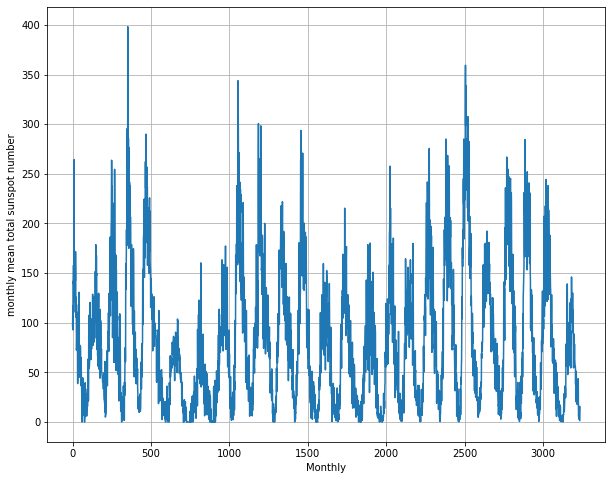

In [ ]:
time_step, sunspots = [], []

with open('./Sunspots.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    time_step.append(int(row[0]))
    sunspots.append(float(row[2]))

time = np.array(time_step)
series = np.array(sunspots)

plot_series(time, series, xlabel='Monthly', ylabel='monthly mean total sunspot number')

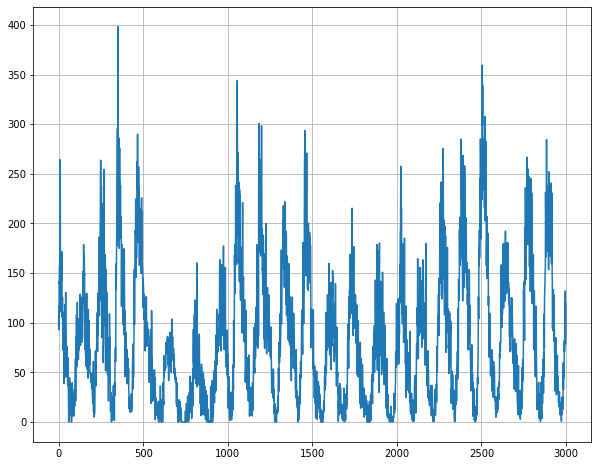

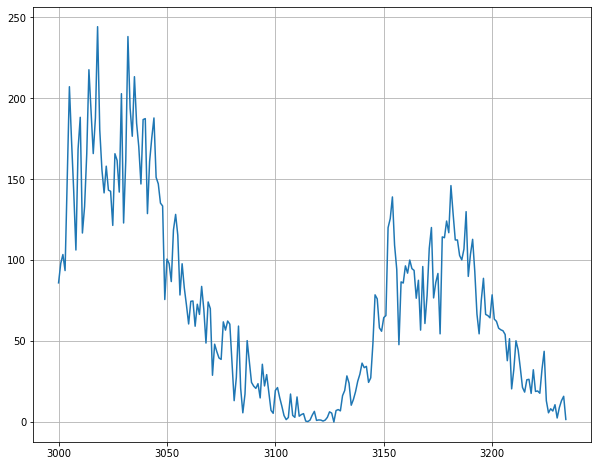

In [ ]:
split = 3000
train_time=time[:split]
train_series = series[:split]
val_time = time[split:]
val_series = series[split:]

plot_series(train_time, train_series)

plot_series(val_time, val_series)

In [ ]:
def generate_dataset(series, buffer_size, batch_size, window_size):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window:window.batch(window_size+1))
  dataset = dataset.map(lambda window:(window[:-1],window[-1]))
  dataset = dataset.shuffle(buffer_size)
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
buffer_size, batch_size, window_size = 1000, 32, 20
dataset = generate_dataset(train_series, buffer_size, batch_size, window_size)

In [ ]:
def creatte_DNN(window_size):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, input_shape = [window_size], activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
  model.summary()
  return model

In [ ]:
dnn_model =creatte_DNN(window_size)
intial_weights = dnn_model.get_weights()
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])
history = model.fit(dataset, epochs = 100, callbacks=[lr_scheduler])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 21.2101 - mae: 21.7039 - lr: 1.0000e-08
Epoch 2/100
94/94 [==============================] - 1s 4ms/step - loss: 21.1542 - mae: 21.6478 - lr: 1.1220e-08
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 21.0897 - mae: 21.582

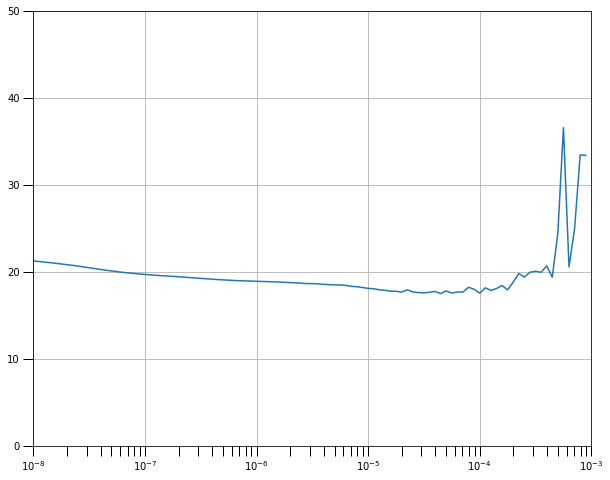

In [ ]:
lrs = 1e-8*10**(np.arange(100)/20)
plt.figure(figsize=(10,8))
plt.grid(True)
plt.semilogx(lrs, history.history['loss'])
plt.tick_params('both', width=1, length=10, which='both')
plt.axis([1e-8, 1e-3, 0, 50])
plt.show()

In [ ]:
tf.keras.backend.clear_session()
dnn_model.set_weights(intial_weights)
optimizer = tf.keras.optimizers.SGD(learning_rate=4e-5, momentum=0.9)
dnn_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])
history = dnn_model.fit(dataset, epochs=100)

Epoch 1/500
94/94 [==============================] - 1s 4ms/step - loss: 29.1972 - mae: 29.6920
Epoch 2/500
94/94 [==============================] - 0s 4ms/step - loss: 20.3190 - mae: 20.8116
Epoch 3/500
94/94 [==============================] - 0s 4ms/step - loss: 19.4348 - mae: 19.9267
Epoch 4/500
94/94 [==============================] - 0s 4ms/step - loss: 18.8987 - mae: 19.3911
Epoch 5/500
94/94 [==============================] - 0s 4ms/step - loss: 18.6596 - mae: 19.1522
Epoch 6/500
94/94 [==============================] - 0s 4ms/step - loss: 18.2645 - mae: 18.7556
Epoch 7/500
94/94 [==============================] - 0s 4ms/step - loss: 18.1144 - mae: 18.6073
Epoch 8/500
94/94 [==============================] - 1s 4ms/step - loss: 17.8799 - mae: 18.3704
Epoch 9/500
94/94 [==============================] - 0s 4ms/step - loss: 18.0786 - mae: 18.5703
Epoch 10/500
94/94 [==============================] - 0s 4ms/step - loss: 17.9023 - mae: 18.3934
Epoch 11/500
94/94 [===================

In [ ]:
def evaluate_dnn_model(model):
  forecast= []
  forecast_sequence = series[split-window_size:]
  # forecast = modell_forecast(forecast_sequence, window_size, batch_size)
  for time in range(len(forecast_sequence)-window_size):
    forecast.append(model.predict(forecast_sequence[time:time+window_size][np.newaxis]))

  forecast = np.array(forecast).squeeze()
  return forecast
forecast = evaluate_dnn_model(dnn_model)
calculate_loss(val_series, forecast)

1/1 [==============================] - 0s 21ms/step
14.283368
431.76913


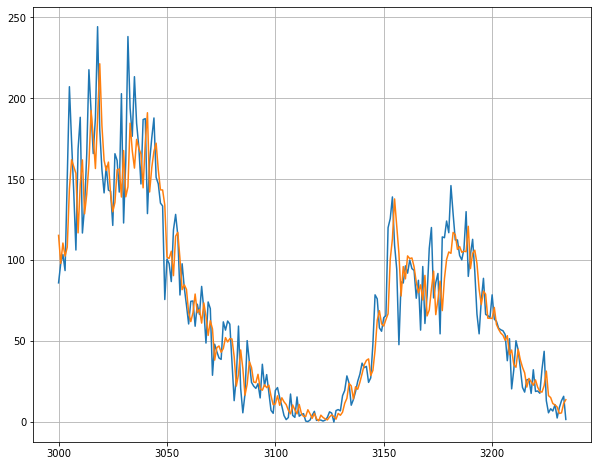

In [ ]:
plot_series(val_time, (val_series, forecast))

In [ ]:
def create_CNN_RNN_model(window_size):
  model= tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(32, 3, padding='causal', strides=1, input_shape=[window_size,1], activation='relu'),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
      tf.keras.layers.Dense(30, activation='relu'),
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Lambda(lambda x:x*400)
  ])
  model.summary()
  return model

In [ ]:
cnn_rnn_model =create_CNN_RNN_model(window_size)
intial_weights = cnn_rnn_model.get_weights()
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
cnn_rnn_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])
history = cnn_rnn_model.fit(dataset, epochs = 100, callbacks=[lr_scheduler])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 20, 32)            128       
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 64)           16640     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 30)                1950      
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 1)                

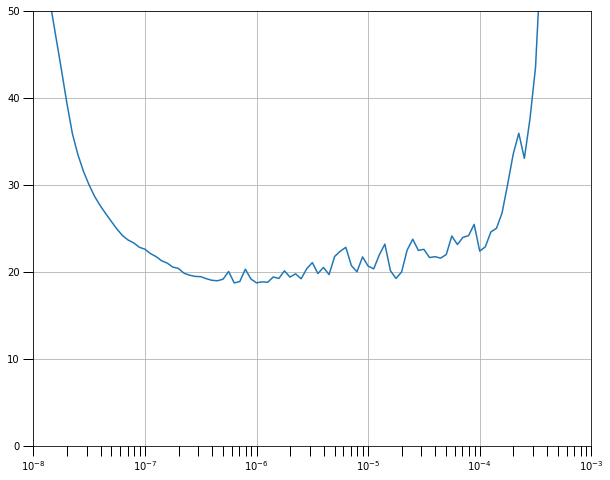

In [ ]:
lrs = 1e-8*10**(np.arange(100)/20)
plt.figure(figsize=(10,8))
plt.grid(True)
plt.semilogx(lrs, history.history['loss'])
plt.tick_params('both', width=1, length=10, which='both')
plt.axis([1e-8, 1e-3, 0, 50])
plt.show()

In [ ]:
tf.keras.backend.clear_session()
val_data = generate_dataset(val_series, buffer_size, batch_size, window_size)
cnn_rnn_model.set_weights(intial_weights)
optimizer = tf.keras.optimizers.SGD(learning_rate=4e-6, momentum=0.9)
cnn_rnn_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])
history = cnn_rnn_model.fit(dataset, epochs=100, validation_data=val_data, callbacks=[callback])

Epoch 1/100
94/94 [==============================] - 13s 54ms/step - loss: 30.0776 - mae: 30.5725 - val_loss: 30.0895 - val_mae: 30.5895
Epoch 2/100
94/94 [==============================] - 3s 35ms/step - loss: 23.5776 - mae: 24.0710 - val_loss: 15.8938 - val_mae: 16.3861
Epoch 3/100
94/94 [==============================] - 3s 35ms/step - loss: 22.2324 - mae: 22.7244 - val_loss: 14.2275 - val_mae: 14.7175
Epoch 4/100
94/94 [==============================] - 3s 35ms/step - loss: 20.4212 - mae: 20.9144 - val_loss: 14.0097 - val_mae: 14.5019
Epoch 5/100
94/94 [==============================] - 3s 35ms/step - loss: 20.7691 - mae: 21.2630 - val_loss: 16.2410 - val_mae: 16.7327
Epoch 6/100
94/94 [==============================] - 3s 35ms/step - loss: 20.0128 - mae: 20.5045 - val_loss: 25.2194 - val_mae: 25.7164
Epoch 7/100
94/94 [==============================] - 3s 35ms/step - loss: 20.3942 - mae: 20.8890 - val_loss: 13.9034 - val_mae: 14.3920
Epoch 8/100
94/94 [============================

1/1 [==============================] - 0s 21ms/step
14.144614
427.12375


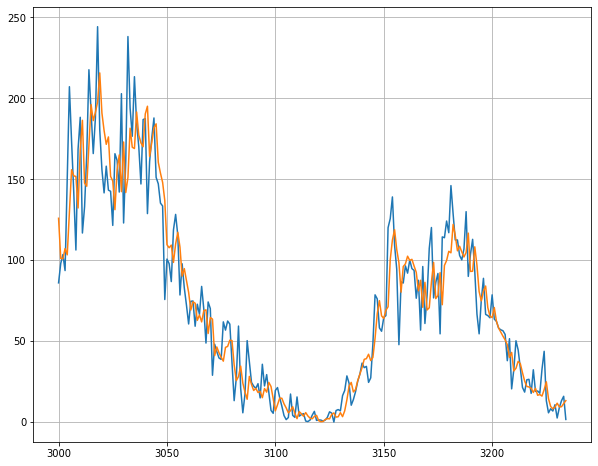

In [ ]:
forecast = evaluate_dnn_model(cnn_rnn_model)
calculate_loss(val_series, forecast)
plot_series(val_time, (val_series, forecast))

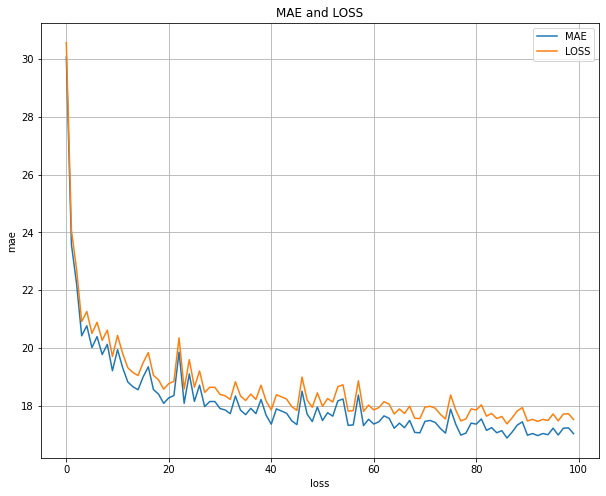

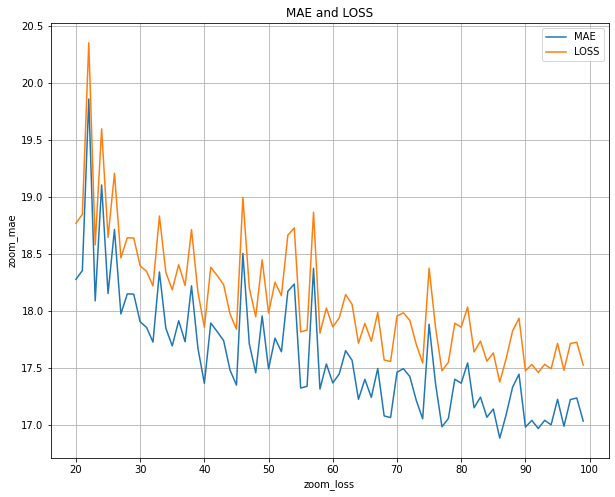

In [ ]:
loss = history.history["loss"]
mae = history.history["mae"]
epochs = range(len(loss))
plot_series(epochs, (loss, mae), xlabel='loss', ylabel='mae', legend=["MAE", "LOSS"], title="MAE and LOSS")

zoom = int(len(epochs)*0.2)
zoom_epochs = epochs[zoom:]
zoom_loss = loss[zoom:]
zoom_mae = mae[zoom:]
plot_series(zoom_epochs, (zoom_loss, zoom_mae), xlabel='zoom_loss', ylabel='zoom_mae', legend=["MAE", "LOSS"], title="MAE and LOSS")

In [ ]:
intial_learning_rate = 1e-7
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(intial_learning_rate, decay_steps=400, decay_rate=0.96, staircase=True)
optimizer = tf.keras.optimizers.SGD(momentum=0.9, learning_rate=lr_scheduler)
